$$
min\ 3x^2+2y^2 \\
subject\ to\ x+y\ge1 
$$

この時，以下のように各種の関数をおくことにする．

$$
f(x)=3x^2+2y^2 \\
h(x)=1-x-y
$$

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import copy
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))


ここで，各種の関数を宣言する．
`raw_target` は対象としている $f(x)$ のこと． `target` は，罰則項を付け加えたもの． `diff_target` は罰則項含めてベクトルの微分をしたものである．

In [53]:
def raw_target(x):
    return 3 * (x[0] ** 2) + 2 * (x[1] ** 2)


def target(x, c):
    return 3 * (x[0]) ** 2 + 2 * (x[1] ** 2) + (c * max(0, 1 - x[0] - x[1])) ** 2


def diff_target(x, c):
    if 1 - x[0] + x[1] < 0:
        return np.array([6 * x[0], 4 * x[1]])
    return np.array([6 * x[0] + (c * 2 * (-1)), 4 * x[1] + (c * 2 *(-1))])


In [54]:
def draw_contour(target):
    n = 100
    x = np.linspace(-3, 1, n)
    y = np.linspace(-5, 1, n)
    X, Y = np.meshgrid(x, y)
    Z = target([X, Y])

    plt.gca().set_aspect('equal')
    plt.contour(X, Y, Z, levels=np.linspace(0, 200, 15))


最急降下法で最適解を求めるが，罰則項の中が負の数になってしまう時にはcを少し小さくする処理を入れている．

In [57]:
def gradient_descent_with_c(ini, c, diff_target):
    err = 0.01
    x_n = copy.deepcopy(ini)
    x_n_scc = 0
    while np.linalg.norm(x_n - x_n_scc) > err:
        eps = 0.1
        x_n_scc = x_n - eps * diff_target(x_n, c)
        while x_n_scc[0] + x_n_scc[1] > 1:
            c *= 0.8
            eps *= 0.9
            x_n_scc = x_n - eps * diff_target(x_n, c)
            
        x_n = copy.deepcopy(x_n_scc)
    return x_n

In [60]:
ini_x = np.array([-3, -5], dtype='float64')
pre = ini_x
cc = 0.1
ans = []
while True:
    a = gradient_descent_with_c(pre, cc, diff_target)
    ans.append(pre)
    if np.linalg.norm(pre - a) < 0.0001:
        break
    pre = copy.deepcopy(a)
    cc *= 1.2
   
ans = np.array(ans)

対象の $f(x)$ のうち，第三象限のみを切り取って等高線を描き，収束の様子をみる．
確かに,オレンジ色より下（すなわち $h(x)\ge1$）を保ちながら，解析的な解である　$(x,y) = (0.4, 0.6)$ に近づいていることがわかる．

[0.40033524 0.5972294 ]


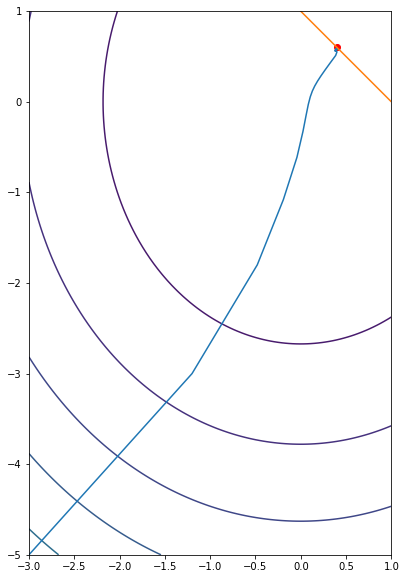

In [61]:
fig, ax = plt.subplots()
ax.plot(ans[:, 0], ans[:, 1])
ax.plot([0, 1], [1, 0])
draw_contour(raw_target)
ax.scatter(0.4,0.6, c = 'R')
print(ans[-1])